In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm
import scipy.stats as ss

In [2]:
Q2= pd.read_csv('LabTAT.csv')
Q2.rename(columns = {'Laboratory 1' : 'lab1', 'Laboratory 2' : 'lab2', 'Laboratory 3': 'lab3','Laboratory 4': 'lab4' }, inplace = True)
Q2

,lab1,lab2,lab3,lab4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


### Normality Test

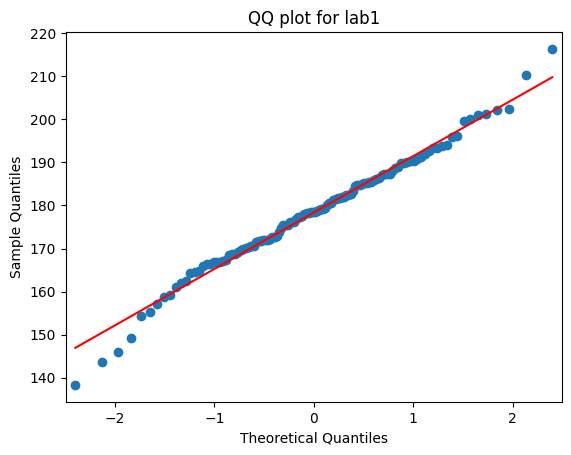

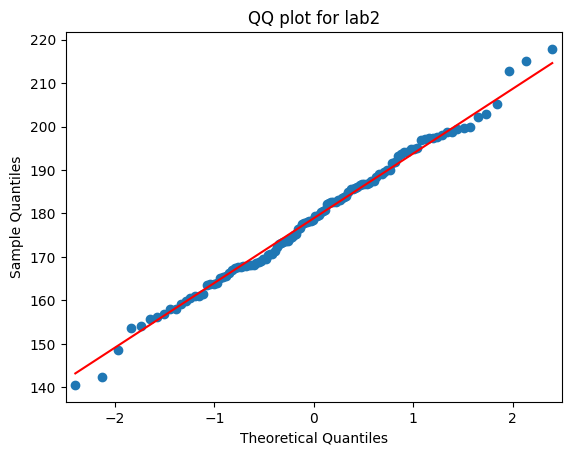

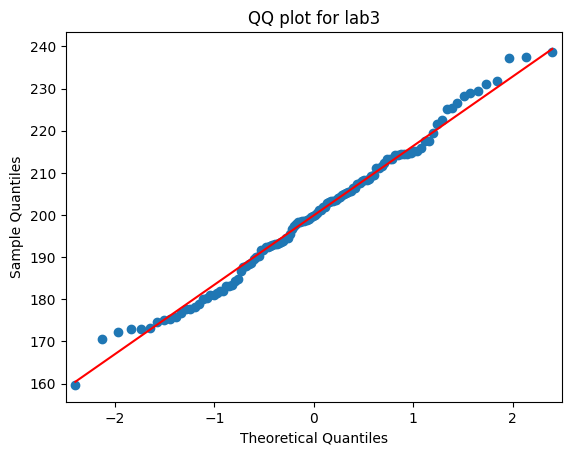

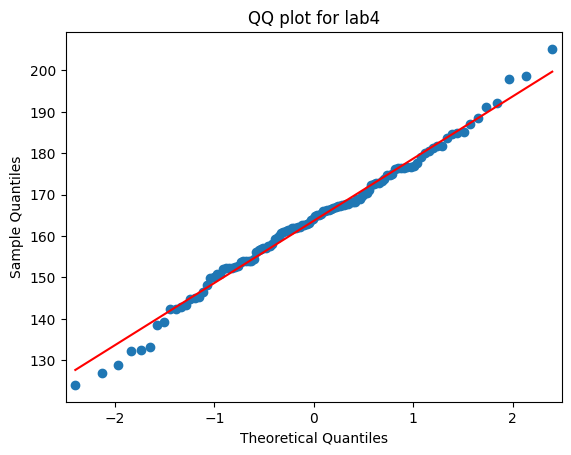

In [4]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming Q2.lab1, Q2.lab2, Q2.lab3, and Q2.lab4 are your data arrays

sm.qqplot(Q2.lab1, line='s')
plt.title('QQ plot for lab1')

sm.qqplot(Q2.lab2, line='s')
plt.title('QQ plot for lab2')

sm.qqplot(Q2.lab3, line='s')
plt.title('QQ plot for lab3')

sm.qqplot(Q2.lab4, line='s')
plt.title('QQ plot for lab4')

plt.show() # Display the plots

 ### Variance Test - Use Bartlett's test for homogeneity of variances
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html#:~:text=Perform%20Bartlett's%20test%20for%20equal,test%20levene%20is%20more%20robust.


In [5]:
ss.bartlett(Q2.lab1,Q2.lab2,Q2.lab3,Q2.lab4) #p-value > 0.05. Therefore, Variances can be assumed to be same. 

BartlettResult(statistic=6.099521405922936, pvalue=0.10686741658105028)

### One way ANOVA test:

The statistic this test returns is equvalent to the variation in variance between inner groups. 
p-value is the only thing we are concerned about.

In [6]:
ss.f_oneway(Q2.lab1,Q2.lab2,Q2.lab3,Q2.lab4) #p-value <<< 0.05

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

### Result

p-value is much smaller than alpha(0.05). This implies that we have to reject the null hypothesis. 
Therefore, we can conclude statistically that there is difference in atleast one of the averages of different laboratories. i.e Atleast one of mean is different.

### Additional:

ANOVA is an omnibus test. It does not tell us which mean is different.In order to find which mean deviates from the rest of the means, we can use the TukeyHSD Test.

To do the tukeyHSD test, we need to change our dataset slightly to accomodate for the tukshey test.

https://www.statology.org/tukey-test-python/#:~:text=One%20of%20the%20most%20commonly,perform%20Tukey's%20Test%20in%20Python.

In [8]:
import numpy as np
import pandas as pd

# Assuming Q2.lab1, Q2.lab2, Q2.lab3, and Q2.lab4 are your Series objects

lab1 = Q2.lab1.reset_index(drop=True)
lab2 = Q2.lab2.reset_index(drop=True)
lab3 = Q2.lab3.reset_index(drop=True)
lab4 = Q2.lab4.reset_index(drop=True)

df = pd.DataFrame({'score': pd.concat([lab1, lab2, lab3, lab4], ignore_index=True),
                   'group': np.repeat(['lab1', 'lab2', 'lab3', 'lab4'], repeats=len(lab1))})


In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  lab1   lab2   0.5413   0.9  -4.4468   5.5294  False
  lab1   lab3  21.5517 0.001  16.5636  26.5398   True
  lab1   lab4 -14.6788 0.001 -19.6669  -9.6907   True
  lab2   lab3  21.0103 0.001  16.0222  25.9984   True
  lab2   lab4 -15.2202 0.001 -20.2083 -10.2321   True
  lab3   lab4 -36.2305 0.001 -41.2186 -31.2424   True
-----------------------------------------------------


### Tukey Result:

Thus, we would conclude that there is a statistically significant difference between the means of labs:(lab1&lab3,lab1&lab4,lab2&lab3,lab2&lab4,lab3&lab4), but not a statistically significant difference between the means of labs lab1 and lab2.